# Global Power Plant Database
Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


In [2]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
from sklearn.model_selection import train_test_split
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [104]:
df=pd.read_csv("database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
df.shape

(907, 27)

In [53]:
df.isna().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

Few columns have null in all the columns , let us delete those columns.

In [105]:
df_null=df.isna().sum()==df.shape[0]
null_cols=list((df_null[df_null.values==True]).index)
null_cols.append('other_fuel2')
df=df.loc[:,~df.columns.isin(null_cols)]
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


# Imputation

Let us split the imputation process depending on the variables:
1) Latitude: Since all the locations are in India let us fill the nulls with mean 
2) Longitude: Since all the locations are in India let us fill the nulls with mean 
3) other_fuel1: Since there are 708 nulls let us fill it with 'No Fuel'
4) commissioning_year: Since there are 380 nulls let us fill it with 'Not Available'
5) owner: Since there are 565 nulls let us fill it with 'Not Available'
6) geolocation_source: Mode
7) year_of_capacity_data: Since there are 388 nulls let us fill it with 'Not Available'
8) generation_gwh_2014 : Mean       
9) generation_gwh_2015 : Mean       
10) generation_gwh_2016 : Mean        
11) generation_gwh_2017 : Mean        
12) generation_gwh_2018 : Mean 
13) generation_data_source: Since there are 458 nulls let us fill it with 'Not Available'

In [115]:
mean_fill=['latitude','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',
           'generation_gwh_2018']
for col in mean_fill:
    df[col].fillna(df[col].mean(),inplace=True)
na_fill=['other_fuel1','owner','generation_data_source']
for col in na_fill:
    df[col].fillna('Not Available',inplace=True)
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0],inplace=True)
df.head()
na_drop=['commissioning_year','year_of_capacity_data']
for col in na_drop:
    df.dropna(subset=na_drop,axis=0,inplace=True)

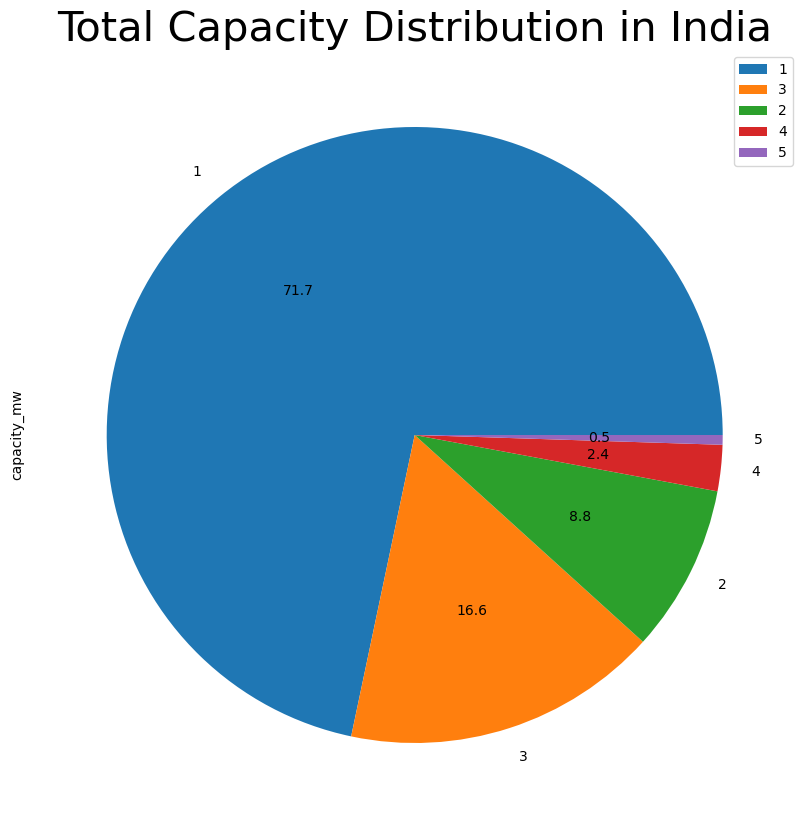

In [116]:
cap_grp=df.groupby(['primary_fuel']).agg({'capacity_mw':'sum'}).sort_values(by='capacity_mw',ascending=False).reset_index()
grouped_sum = df['capacity_mw'].sum()
plt.figure(figsize=(20,10))
cap_grp['capacity_mw'].plot(kind='pie',autopct='%.1f',labels=cap_grp['primary_fuel'])
plt.title('Total Capacity Distribution in India',fontsize=30)
plt.legend(cap_grp['primary_fuel'])
plt.show()

Coal is still 70% of the total installed capacity . Hydro is the second highest with 15.7%

# Capacity MW Prediction

This is a continuous variable , it is a regression problem. 

In [117]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        print(col)
        df[col]=le.fit_transform(df[col])

In [118]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((363, 20), (156, 20), (363,), (156,))

In [119]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

In [120]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [121]:
# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [122]:
# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis
    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 
    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 189.382
Mean Squared Error (MSE): 90745.096
Root Mean Squared Error (RMSE): 301.239
R2_score: 0.824734
Root Mean Squared Log Error (RMSLE): 5.708
Mean Absolute Percentage Error (MAPE): 157.3 %
Adj R Square:  0.817695
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 330.08
Mean Squared Error (MSE): 239640.845
Root Mean Squared Error (RMSE): 489.531
R2_score: 0.537156
Root Mean Squared Log Error (RMSLE): 6.193
Mean Absolute Percentage Error (MAPE): 1622.28 %
Adj R Square:  0.518568
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 230.607
Mean Squared Error (MSE): 112685.995
Root Mean Squared Error (RMSE): 335.687
R2_score: 0.782357
Root Mean Squared Log Error (RMSLE): 5.816
Mean Absolut

In [124]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.848840,172.210528,274.303848,93.858378,75242.600821,5.614236,0.854676
1,Lasso Regression,0.819350,187.907921,299.868587,153.279950,89921.169479,5.703344,0.826325
2,LinearRegression,0.817695,189.382045,301.239268,157.297289,90745.096432,5.707905,0.824734
3,GradientBoostingRegressor,0.814485,205.649619,303.879978,478.382441,92343.041314,5.716633,0.821648
4,Ridge Regression,0.799693,194.556540,315.762893,179.544982,99706.204783,5.754992,0.807427
5,RandomForestRegressor,0.773616,230.607353,335.687347,716.614013,112685.994763,5.816180,0.782357
6,BaggingRegressor,0.758073,249.966656,347.019912,773.648923,120422.819425,5.849382,0.767414
7,XGBRegressor,0.721615,260.522658,372.250938,1091.282359,138570.761033,5.919568,0.732363
8,KNeighborsRegressor,0.716135,238.380287,375.896591,100.846790,141298.247098,5.929314,0.727095
9,DecisionTreeRegressor,0.518568,330.079667,489.531251,1622.278245,239640.845383,6.193448,0.537156


# From the Above Results, The Top 3 Models by comparing Errors , Adj_R_Square and R2_Score values are
1. ExtraTreesRegressor 2. LassoRegression 3. LinearRegression

# Primary fuel prediction

In [126]:
# storing the Dependent Variables in X and Independent Variable in Y
x_class=df.drop(['primary_fuel'],axis=1)
y_class=df['primary_fuel']
x_class_train,x_class_test,y_class_train,y_class_test=train_test_split(x_class,y_class,test_size=0.30,random_state=42)

In [127]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_class_train=mmscaler.fit_transform(x_class_train)
x_class_test=mmscaler.fit_transform(x_class_test)
x_class_train=pd.DataFrame(x_class_train)
x_class_test=pd.DataFrame(x_class_test) 

In [128]:
a_class={'Model Name':[], 'Accuracy Score':[] ,'Precision Score':[] ,'Recall Score':[] ,'F1 Score':[]}
Results_class=pd.DataFrame(a_class)
Results_class.head()

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score


In [131]:
# Create objects of Regression / Regressor models with default hyper-parameters

modellog = LogisticRegression()
modeldtc = DecisionTreeClassifier()
modelbagc = BaggingClassifier()
modelrfc = RandomForestClassifier()
# modelSVC = SVC()
# modelXGC = xgb.XGBClassifier()
modelKNNC = KNeighborsClassifier(n_neighbors=5)
modelETC = ExtraTreesClassifier()

modelGBC = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [132]:
# Evalution matrix for all the algorithms

MM = [modellog, modeldtc, modelbagc, modelrfc, modelKNNC, modelETC,modelGBC]

for models in MM:
    print(models)
    # Fit the model with train data
    
    models.fit(x_class_train, y_class_train)
    
    # Predict the model with test data

    y_class_pred = models.predict(x_class_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis
    from sklearn import metrics

    print('Accuracy Score:', round(accuracy_score(y_class_test, y_class_pred),3))  
    print('Precision Score:', round(precision_score(y_class_test, y_class_pred,average='weighted'),3))  
    print('Recall Score:', round(recall_score(y_class_test, y_class_pred,average='weighted'),3))
    print('F1_Score:', round(f1_score(y_class_test, y_class_pred,average='weighted'),6))
#     print('Area Under Curve:', round(roc_auc_score(y_class_test, y_class_pred,multi_class='ovr'),3))
    
    print('------------------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'Accuracy Score' : round(accuracy_score(y_class_test, y_class_pred),3),
               'Precision Score' : round(precision_score(y_class_test, y_class_pred,average='weighted'),3),
               'Recall Score' : round(recall_score(y_class_test, y_class_pred,average='weighted'),3),
               'F1 Score' : round(f1_score(y_class_test, y_class_pred,average='weighted'),6)
              }
    Results_class = Results_class.append(new_row, ignore_index=True)
    #------------------------------------------------------------

LogisticRegression()
Model Name:  LogisticRegression()
Accuracy Score: 0.833
Precision Score: 0.709
Recall Score: 0.833
F1_Score: 0.762022
------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier()
Model Name:  DecisionTreeClassifier()
Accuracy Score: 0.692
Precision Score: 0.729
Recall Score: 0.692
F1_Score: 0.68719
------------------------------------------------------------------------------------------------------------
BaggingClassifier()
Model Name:  BaggingClassifier()
Accuracy Score: 0.545
Precision Score: 0.635
Recall Score: 0.545
F1_Score: 0.49806
------------------------------------------------------------------------------------------------------------
RandomForestClassifier()
Model Name:  RandomForestClassifier()
Accuracy Score: 0.878
Precision Score: 0.882
Recall Score: 0.878
F1_Score: 0.851198
---------------------------------------------------------------------------------------------------------

In [133]:
models=['LogisticRegression','DecisionTreeClassifier','BaggingClassifier','RandomForestClassifier','KNeighborsClassifier','ExtraTreesRegressor','GradientBoostingClassifier']
result_class=pd.DataFrame({'Model_Name':models})
result_class['Accuracy Score']=Results_class['Accuracy Score']
result_class['Recall Score']=Results_class['Recall Score']
result_class['Precision Score']=Results_class['Precision Score']
result_class['F1 Score']=Results_class['F1 Score']
result_class=result_class.sort_values(by='F1 Score',ascending=False).reset_index(drop=True)
result_class

,Model_Name,Accuracy Score,Recall Score,Precision Score,F1 Score
0,RandomForestClassifier,0.859,0.859,0.849,0.825013
1,BaggingClassifier,0.821,0.821,0.797,0.804224
2,LogisticRegression,0.833,0.833,0.709,0.762022
3,KNeighborsClassifier,0.833,0.833,0.709,0.762022
4,DecisionTreeClassifier,0.731,0.731,0.782,0.728050
5,ExtraTreesRegressor,0.692,0.692,0.729,0.687190
6,GradientBoostingClassifier,0.545,0.545,0.635,0.498060


# Random Forest Classifier is the best model for classification.